In [28]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Reading data and using pandas to create DataFrame
path = "D:/10Acadamy/Solar-Radiation-Analysis/data/benin-malanville.csv"
dataFrame = pd.read_csv(path)
print(dataFrame.head())

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [18]:
# Printing description of the dataset
print(dataFrame.describe())

                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000000      24.2000

In [19]:
# Checking if there is a null value
print(dataFrame.isnull().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [20]:
# Droping Comments column because it have no value 
dataFrame = dataFrame.drop(columns=['Comments'])

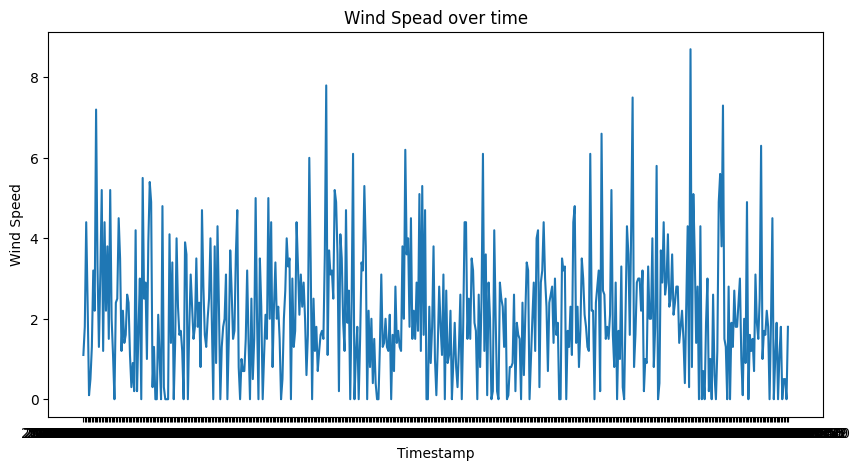

In [21]:
# Ploting graph to show Wind Speed over time
sampleDataFrame = dataFrame.sample(500)
plt.figure(figsize=(10, 5))
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['WS'])
plt.title('Wind Spead over time')
plt.xlabel('Timestamp')
plt.ylabel('Wind Speed')
plt.show()

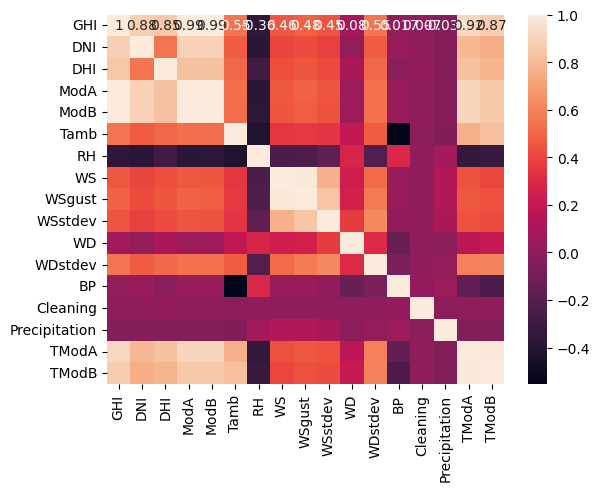

In [22]:
#  Generate and Display correlation heatmap
correlation = dataFrame.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True)
plt.show()

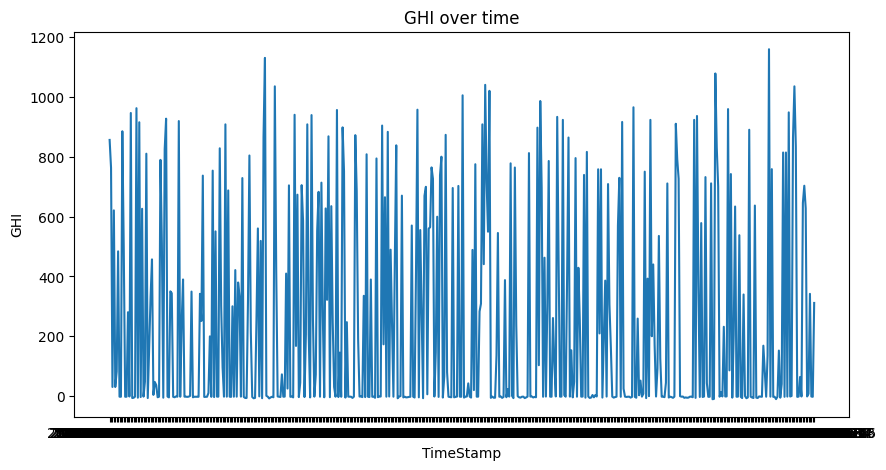

In [23]:
# Ploting graph to show Global Horizontal Irradiance over time
sampleDataFrame = dataFrame.sample(500)
plt.figure(figsize=(10, 5))
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['GHI'])
plt.title('GHI over time')
plt.xlabel('TimeStamp')
plt.ylabel('GHI')
plt.show()

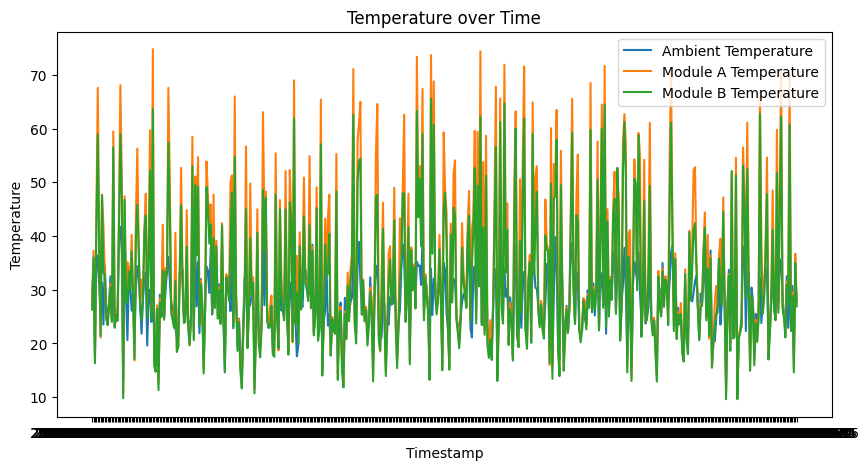

In [24]:
# Plot temperature trends from sampled data
sampleDataFrame = dataFrame.sample(500)
plt.figure(figsize=(10, 5))
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['Tamb'], label = 'Ambient Temperature')
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['TModA'], label = 'Module A Temperature')
plt.plot(sampleDataFrame['Timestamp'], sampleDataFrame['TModB'], label = 'Module B Temperature')
plt.title("Temperature over Time")
plt.xlabel('Timestamp')
plt.ylabel('Temperature')
plt.legend()
plt.show()

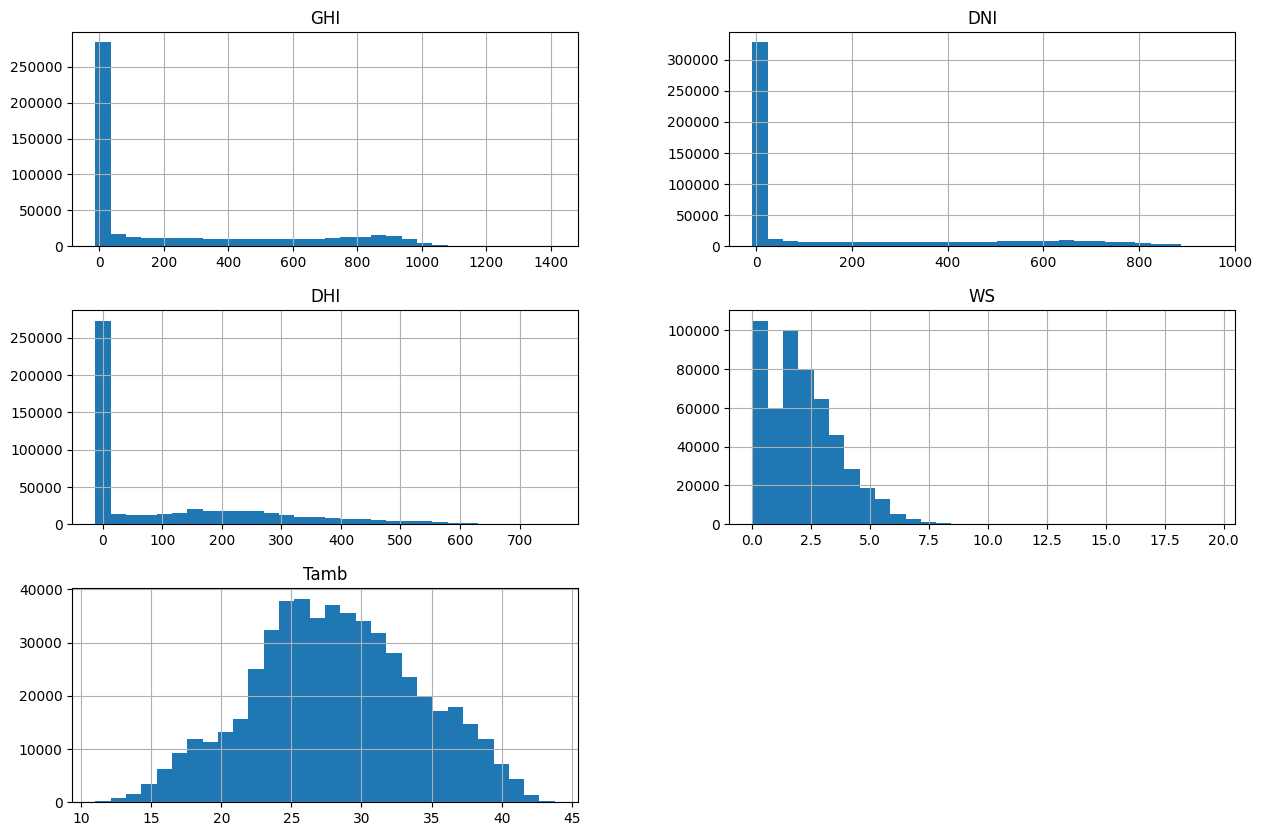

In [25]:
# Display histograms for Global Horizontal Irradiance, Direct Normal Irradiance, Diffuse Horizontal Irradiance, Wind Speed, Ambient Temperature
dataFrame[['GHI', 'DNI', 'DHI', 'WS', 'Tamb']].hist(bins = 30, figsize=(15, 10))
plt.show()

d:\10Acadamy\Solar-Radiation-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\10Acadamy\Solar-Radiation-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\10Acadamy\Solar-Radiation-Analysis\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


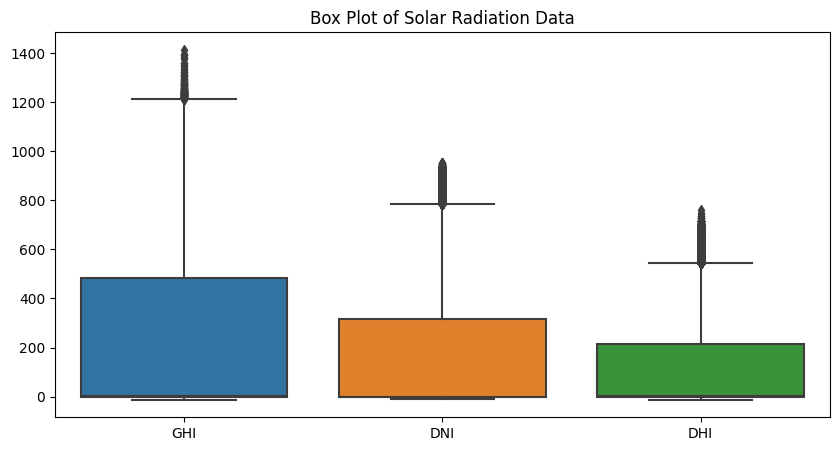

In [26]:
# Show box plot for solar radiation
plt.figure(figsize=(10, 5))
sns.boxplot(data = dataFrame[['GHI', 'DNI', 'DHI']])
plt.title('Box Plot of Solar Radiation Data')
plt.show()

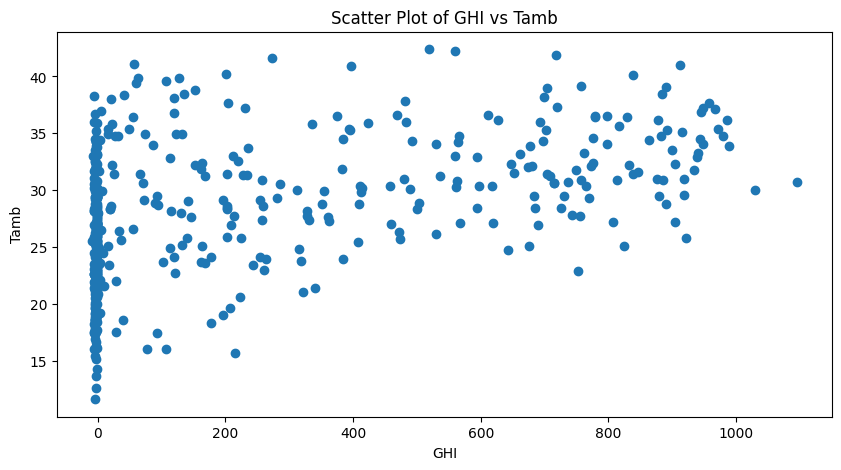

In [27]:
# Plot scatter graph of GHI vs Tamb
sampleDataFrame = dataFrame.sample(500)
plt.figure(figsize=(10, 5))
plt.scatter(sampleDataFrame['GHI'], sampleDataFrame['Tamb'])
plt.title('Scatter Plot of GHI vs Tamb')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()